In [1]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model, load_model
import seaborn as sns
import datetime
import os.path
import datetime
from importlib import reload

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# Import self-made modules
from utils import *
from autoencoder import AutoEncoder

In [3]:
# Reload libraries when changes have been made to them
%reload_ext autoreload
%autoreload 2

In [5]:
# Set file path constants
DATA_FILE_PATH = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/'
DIAGRAM_FILE_PATH = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/'

In [10]:
# Set parameters
WIN_SIZE = 20
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)

In [11]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-patient-shaved.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (38167, 20, 3)


In [12]:
compress = 0.25
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one

15

In [13]:
quart_time_code = '185000_0428'
quart_model_file = f'{quart_time_code}-model.h5'
quart_model_file

'185000_0428-model.h5'

In [15]:
quart = AutoEncoder(units_one, None, trainX, 3, quart_model_file, DIAGRAM_FILE_PATH)

Checking for 185000_0428-model.h5

Model loaded from: 185000_0428-model.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15)                1140      
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 20, 15)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 15)            1860      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 15)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 20, 3)             48        
Total params: 3,048
Trainable params: 3,048
Non

In [47]:
trainPredict = quart.model.predict(trainX)

Saved as: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/eg-window-7103-C=0.25-4.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

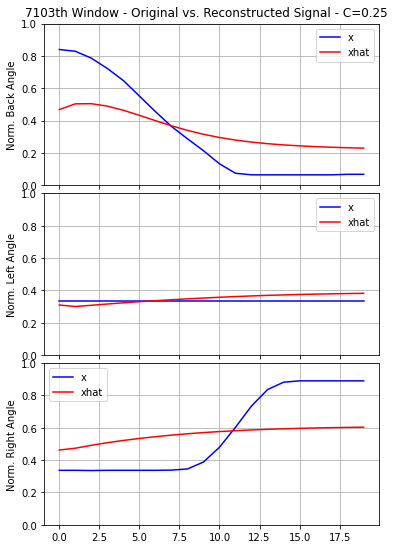

In [48]:
example_plot(7103, no_feats, WIN_SIZE, trainX, trainPredict, 'C=0.25', DIAGRAM_FILE_PATH, True)

In [17]:
half_time_code = '190000_0428'
half_model_file = f'{half_time_code}-model.h5'
half_model_file

'190000_0428-model.h5'

In [18]:
half = AutoEncoder(units_one, None, trainX, 3, half_model_file, DIAGRAM_FILE_PATH)

Checking for 190000_0428-model.h5

Model loaded from: 190000_0428-model.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30)                4080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 20, 30)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 30)            7320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 30)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 3)             93        
Total params: 11,493
Trainable params: 11,493

In [49]:
trainPredict = half.model.predict(trainX)

Saved as: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/eg-window-7103-C=0.5-5.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

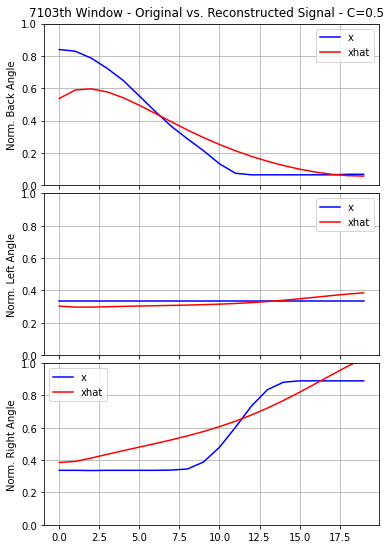

In [50]:
example_plot(7103, no_feats, WIN_SIZE, trainX, trainPredict, 'C=0.5', DIAGRAM_FILE_PATH, True)

In [19]:
threequart_time_code = '192000_0428'
threequart_model_file = f'{threequart_time_code}-model.h5'
threequart_model_file

'192000_0428-model.h5'

In [20]:
threequart = AutoEncoder(units_one, None, trainX, 3, threequart_model_file, DIAGRAM_FILE_PATH)

Checking for 192000_0428-model.h5

Model loaded from: 192000_0428-model.h5
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 45)                8820      
_________________________________________________________________
dropout_4 (Dropout)          (None, 45)                0         
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 20, 45)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 20, 45)            16380     
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 45)            0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 3)             138       
Total params: 25,338
Trainable params: 25,338

In [51]:
trainPredict = threequart.model.predict(trainX)

Saved as: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/eg-window-7103-C=0.75-4.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

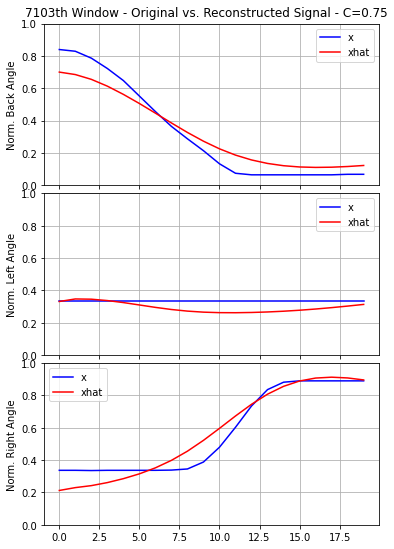

In [52]:
example_plot(7103, no_feats, WIN_SIZE, trainX, trainPredict, 'C=0.75', DIAGRAM_FILE_PATH, True)